In [1]:
#run if on colab
!git clone https://github.com/NavairaRehman/Neural3DMM.git
%cd Neural3DMM
!pip install -r requirements.txt

Cloning into 'Neural3DMM'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 146 (delta 77), reused 126 (delta 67), pack-reused 0 (from 0)
Receiving objects: 100% (146/146), 1.48 MiB | 11.77 MiB/s, done.
Resolving deltas: 100% (77/77), done.
/content/Neural3DMM
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.0/707.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 10.4 MB/s eta 0:00:0

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#unzip a file to a folder
!unzip -q '/content/drive/MyDrive/Shared Folder/ThreeDFN.zip' -d /content/

In [5]:
!mkdir root_data
!mkdir root_data/Facial_Norms
!mkdir root_data/Facial_Norms/preprocessed
!mkdir root_data/Facial_Norms/template
!mkdir root_data/Facial_Norms/template/COMA_downsample

In [7]:
import shutil

source = "/content/drive/MyDrive/Shared Folder/3dfn_template.obj"
destination = "/content/Neural3DMM/root_data/Facial_Norms/template"

shutil.copy(source, destination)  # Copies the file

'/content/Neural3DMM/root_data/Facial_Norms/template/3dfn_template.obj'

## Preparing the data for triplet network

In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [9]:


# Load CSV
csv_path = "/content/drive/MyDrive/3D Gen/3dfn_final_encoded.csv"
df = pd.read_csv(csv_path)
df



,user_id,rs507217,rs2277054,rs2709922,rs199501,rs2724626,rs1357582,rs10001971,rs4925108,rs3822601,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,1010000319,0,2,2,2,2,2,0,1,0,...,-9.725439,15.949081,57.454457,-17.424754,0.152287,48.578521,32.043285,-48.722512,-11.848517,36.198413
1,1010000348,1,1,2,2,1,2,0,2,1,...,-27.323635,-4.382876,-33.640967,2.038422,26.064868,-0.616492,-6.430630,33.186433,-1.596137,-26.420770
2,1010000542,1,0,2,2,2,2,1,2,1,...,-13.867089,-7.252163,19.449924,6.702199,-16.173990,34.514819,43.547907,-4.595623,23.014193,-27.903333
3,1010000751,1,1,1,2,2,2,0,2,0,...,36.771547,42.912642,-10.004996,49.043943,10.047512,3.551532,5.458356,-12.312026,18.204883,-25.572672
4,1010000758,2,0,1,1,2,2,0,2,0,...,40.326072,-38.913935,-4.679983,-28.550992,-22.736133,-21.833582,1.250313,8.418322,0.592491,6.466592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,1310266339,2,0,1,1,1,2,0,1,1,...,-8.547579,2.859957,7.042664,-4.723980,-62.170815,-29.647579,2.345191,-24.809315,-3.117477,-8.245930
2362,1310274872,2,1,1,2,1,2,1,2,0,...,-66.290909,23.812946,18.902248,57.251415,29.660785,-14.350285,-6.529491,-1.996818,6.678381,15.565279
2363,1310566789,2,2,1,1,2,2,0,2,1,...,-12.404077,-11.592363,3.607778,20.423917,1.682804,-12.470894,49.804805,25.742392,52.570195,33.979641
2364,1310621438,2,1,1,2,2,2,0,1,0,...,18.752360,-8.979751,-22.901290,44.634781,41.633100,-17.169875,55.307419,-11.726351,6.390669,7.952189


In [10]:
#keep only user_id and sex col
df = df[['user_id', 'sex']]
df

,user_id,sex
0,1010000319,2
1,1010000348,2
2,1010000542,1
3,1010000751,2
4,1010000758,2
...,...,...
2361,1310266339,1
2362,1310274872,2
2363,1310566789,2
2364,1310621438,2


In [11]:
snp_dict = {int(row['user_id']): int(row['sex']) for _, row in df.iterrows()}
print(snp_dict)

{1010000319: 2, 1010000348: 2, 1010000542: 1, 1010000751: 2, 1010000758: 2, 1010001421: 1, 1010003879: 1, 1010004257: 2, 1010004278: 1, 1010004580: 2, 1010005638: 2, 1010005808: 1, 1010008469: 2, 1010008470: 2, 1010009795: 2, 1010011042: 2, 1010011159: 1, 1010011275: 1, 1010012102: 2, 1010014036: 2, 1010014041: 1, 1010014129: 2, 1010015075: 2, 1010015737: 2, 1010016117: 1, 1010016855: 1, 1010017310: 1, 1010017312: 1, 1010017866: 2, 1010018315: 2, 1010018415: 1, 1010019559: 2, 1010019835: 2, 1010020060: 2, 1010020445: 2, 1010020749: 2, 1010021049: 1, 1010021485: 2, 1010021791: 2, 1010021974: 1, 1010021996: 2, 1010022615: 1, 1010023124: 1, 1010023262: 2, 1010023587: 1, 1010023712: 2, 1010024105: 2, 1010025902: 2, 1010025992: 2, 1010026640: 2, 1010027795: 2, 1010028567: 2, 1010028727: 1, 1010028971: 1, 1010029103: 2, 1010030815: 2, 1010032575: 1, 1010034244: 2, 1010034262: 2, 1010034612: 2, 1010035033: 2, 1010035528: 1, 1010036040: 1, 1010036300: 2, 1010036358: 2, 1010036499: 2, 101003666

In [12]:

filenames = list(snp_dict.keys())
print(filenames)
# Adjust test_size (e.g., 0.2 for 20% test data) and random_state as needed
train_files, test_files = train_test_split(filenames, test_size=0.2, random_state=42)


[1010000319, 1010000348, 1010000542, 1010000751, 1010000758, 1010001421, 1010003879, 1010004257, 1010004278, 1010004580, 1010005638, 1010005808, 1010008469, 1010008470, 1010009795, 1010011042, 1010011159, 1010011275, 1010012102, 1010014036, 1010014041, 1010014129, 1010015075, 1010015737, 1010016117, 1010016855, 1010017310, 1010017312, 1010017866, 1010018315, 1010018415, 1010019559, 1010019835, 1010020060, 1010020445, 1010020749, 1010021049, 1010021485, 1010021791, 1010021974, 1010021996, 1010022615, 1010023124, 1010023262, 1010023587, 1010023712, 1010024105, 1010025902, 1010025992, 1010026640, 1010027795, 1010028567, 1010028727, 1010028971, 1010029103, 1010030815, 1010032575, 1010034244, 1010034262, 1010034612, 1010035033, 1010035528, 1010036040, 1010036300, 1010036358, 1010036499, 1010036669, 1010036756, 1010037125, 1010037435, 1010037555, 1010037932, 1010037991, 1010038670, 1010038918, 1010038939, 1010038944, 1010039975, 1010040434, 1010040443, 1010041520, 1010042344, 1010043653, 101

In [13]:
def parse_obj(filepath):
    """
    Simple .obj parser that extracts vertex coordinates.
    Assumes each line starting with 'v ' contains 3D coordinates.
    """
    vertices = []
    with open(filepath, 'r') as f:
        for line in f:
            # Only process vertex lines
            if line.startswith('v '):
                parts = line.strip().split()
                # Convert x, y, z values from strings to floats
                vertex = [float(x) for x in parts[1:4]]
                vertices.append(vertex)
    return np.array(vertices)

In [14]:
obj_dir = "/content/3dfn_final_symmsmooaligned"

train_meshes = []
train_pcs = []
for fname in train_files:
    obj_path = os.path.join(obj_dir, f"symmetrized_{fname}_cleaned.obj")
    # Parse the .obj file to get the mesh vertices (shape: (num_vertices, 3))
    mesh = parse_obj(obj_path)
    train_meshes.append(mesh)
    # Get the binary PC vector corresponding to this file
    train_pcs.append(snp_dict[fname])

# If all meshes have the same number of vertices, stack them into a single array.
# The resulting shape will be (number_train_samples, number_vertices, 3)
train_meshes = np.stack(train_meshes, axis=0)
train_pcs = np.array(train_pcs)  # shape: (number_train_samples, 23)

# --- Step 6: Process the testing data ---
test_meshes = []
test_pcs = []
for fname in test_files:
    obj_path = os.path.join(obj_dir, f"symmetrized_{fname}_cleaned.obj")
    mesh = parse_obj(obj_path)
    test_meshes.append(mesh)
    test_pcs.append(snp_dict[fname])

test_meshes = np.stack(test_meshes, axis=0)
test_pcs = np.array(test_pcs)

# --- Step 7: Save the mesh data and PC labels as .npy files ---
np.save("/content/Neural3DMM/root_data/Facial_Norms/preprocessed/train_meshes.npy", train_meshes)  # Mesh data for training
np.save("/content/Neural3DMM/root_data/Facial_Norms/preprocessed/test_meshes.npy", test_meshes)    # Mesh data for testing
np.save("/content/Neural3DMM/root_data/Facial_Norms/preprocessed/train_pcs.npy", train_pcs)        # Binary PC vectors for training
np.save("/content/Neural3DMM/root_data/Facial_Norms/preprocessed/test_pcs.npy", test_pcs)          # Binary PC vectors for testing

print("Train and test data saved successfully.")

Train and test data saved successfully.


In [16]:


# Load the saved numpy arrays
train_meshes = np.load("/content/Neural3DMM/root_data/Facial_Norms/preprocessed/train_meshes.npy")
test_meshes = np.load("/content/Neural3DMM/root_data/Facial_Norms/preprocessed/test_meshes.npy")
train_pcs = np.load("/content/Neural3DMM/root_data/Facial_Norms/preprocessed/train_pcs.npy")
test_pcs = np.load("/content/Neural3DMM/root_data/Facial_Norms/preprocessed/test_pcs.npy")

# Check the shapes
print('Shape of train_meshes:', train_meshes.shape)
print('Shape of test_meshes:', test_meshes.shape)
print('Shape of train_pcs:', train_pcs.shape)
print('Shape of test_pcs:', test_pcs.shape)

Shape of train_meshes: (1892, 7160, 3)
Shape of test_meshes: (474, 7160, 3)
Shape of train_pcs: (1892,)
Shape of test_pcs: (474,)


In [ ]:
#reshaoe train_pcs and test_pcs files to have 2 dimensions
train_pcs = train_pcs.reshape(-1, 1)
test_pcs = test_pcs.reshape(-1, 1)

#save npy files
np.save(r"D:\GeMorph\FaceGen\Neural3DMM\root_data\Facial_Norms\preprocessed\train_pcs.npy", train_pcs)        # Binary PC vectors for training
np.save(r"D:\GeMorph\FaceGen\Neural3DMM\root_data\Facial_Norms\preprocessed\test_pcs.npy", test_pcs)          # Binary PC vectors for testing

## average mesh for 3dfn

In [ ]:
import os
import trimesh
import numpy as np

# Set the path to the folder containing the OBJ files
folder_path = '3dfn_final_symmsmooaligned'  # Replace with the path to your folder

# List all files in the folder
obj_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.obj')]

# Load all the meshes
meshes = [trimesh.load_mesh(file) for file in obj_files]

# Initialize a numpy array to store the sum of the vertices (use the first mesh to get shape)
num_meshes = len(meshes)
num_vertices = meshes[0].vertices.shape[0]  # All meshes should have the same number of vertices
vertex_sum = np.zeros_like(meshes[0].vertices)

# Sum the vertices of all meshes
for mesh in meshes:
    vertex_sum += mesh.vertices

# Compute the average of the vertices
average_vertices = vertex_sum / num_meshes

# Create a new mesh with the averaged vertices and the original faces
template_mesh = trimesh.Trimesh(vertices=average_vertices, faces=meshes[0].faces)

# Export the template mesh as a new OBJ file
template_mesh.export('3dfn_template.obj')

print("Template mesh created and saved as '3dfn_template.obj'.")

Template mesh created and saved as '3dfn_template.obj'.


## Fine Tuning

In [17]:
!pip install git+https://github.com/MPI-IS/mesh.git

  Cloning https://github.com/MPI-IS/mesh.git to /tmp/pip-req-build-8ads77al
  Running command git clone --filter=blob:none --quiet https://github.com/MPI-IS/mesh.git /tmp/pip-req-build-8ads77al
  Resolved https://github.com/MPI-IS/mesh.git to commit 49e70425cf373ec5269917012bda2944215c5ccd
  Preparing metadata (setup.py) ... done
  Created wheel for psbody-mesh: filename=psbody_mesh-0.4-cp311-cp311-linux_x86_64.whl size=2321660 sha256=afca3d10e416885fb3793c33f153aea71c3c58702833aba9e5b94dab0361fccc
  Stored in directory: /tmp/pip-ephem-wheel-cache-k8sk9jcm/wheels/f9/3c/ac/b3d1c84ec8972b9c7d1bf82a23432a142fa6bb4fba62c6c4d8
Successfully built psbody-mesh


In [22]:
import numpy as np
import json
import os
import copy
import pickle

# import mesh_sampling
import trimesh
from shape_data import ShapeData

from autoencoder_dataset import autoencoder_dataset
from torch.utils.data import DataLoader

from spiral_utils import get_adj_trigs, generate_spirals
from models import SpiralAutoencoder
# from train_funcs import train_autoencoder_dataloader
# from test_funcs import test_autoencoder_dataloader


import torch
from tensorboardX import SummaryWriter

from sklearn.metrics.pairwise import euclidean_distances
meshpackage = 'mpi-mesh' # 'mpi-mesh', 'trimesh'
root_dir = 'root_data'

dataset = 'Facial_Norms'
name = ''

GPU = False
# device_idx = 0
# torch.cuda.get_device_name(device_idx)

In [23]:
args = {}

generative_model = 'autoencoder'
downsample_method = 'COMA_downsample' # choose'COMA_downsample' or 'meshlab_downsample'


# below are the arguments for the DFAUST run
reference_mesh_file = os.path.join(root_dir, dataset, 'template', '3dfn_template.obj')
downsample_directory = os.path.join(root_dir, dataset,'template', downsample_method)
ds_factors = [4, 4, 4, 4]
step_sizes = [2, 2, 1, 1, 1]
filter_sizes_enc = [[3, 16, 32, 64, 128],[[],[],[],[],[]]]
filter_sizes_dec = [[128, 64, 32, 32, 16],[[],[],[],[],3]]
dilation_flag = True
if dilation_flag:
    dilation=[2, 2, 1, 1, 1]
else:
    dilation = None
reference_points = [[414]]  # [[3567,4051,4597]] used for COMA with 3 disconnected components

args = {'generative_model': generative_model,
        'name': name, 'data': os.path.join(root_dir, dataset, 'preprocessed',name),
        'results_folder':  os.path.join(root_dir, dataset,'results/spirals_'+ generative_model),
        'reference_mesh_file':reference_mesh_file, 'downsample_directory': downsample_directory,
        'checkpoint_file': 'checkpoint',
        'seed':2, 'loss':'l1',
        'batch_size':128, 'num_epochs':300, 'eval_frequency':200, 'num_workers': 4,
        'filter_sizes_enc': filter_sizes_enc, 'filter_sizes_dec': filter_sizes_dec,
        'nz':16,
        'ds_factors': ds_factors, 'step_sizes' : step_sizes, 'dilation': dilation,

        'lr':1e-3,
        'regularization': 5e-5,
        'scheduler': True, 'decay_rate': 0.99,'decay_steps':1,
        'resume': False,

        'mode':'train', 'shuffle': True, 'nVal': 100, 'normalization': True}

args['results_folder'] = os.path.join(args['results_folder'],'latent_'+str(args['nz']))

if not os.path.exists(os.path.join(args['results_folder'])):
    os.makedirs(os.path.join(args['results_folder']))

summary_path = os.path.join(args['results_folder'],'summaries',args['name'])
if not os.path.exists(summary_path):
    os.makedirs(summary_path)

checkpoint_path = os.path.join(args['results_folder'],'checkpoints', args['name'])
if not os.path.exists(checkpoint_path):
    os.makedirs(checkpoint_path)

samples_path = os.path.join(args['results_folder'],'samples', args['name'])
if not os.path.exists(samples_path):
    os.makedirs(samples_path)

prediction_path = os.path.join(args['results_folder'],'predictions', args['name'])
if not os.path.exists(prediction_path):
    os.makedirs(prediction_path)

if not os.path.exists(downsample_directory):
    os.makedirs(downsample_directory)

In [24]:
from psbody.mesh import Mesh
import mesh_sampling

np.random.seed(args['seed'])
print("Loading data .. ")
if not os.path.exists(args['data']+'/mean.npy') or not os.path.exists(args['data']+'/std.npy'):
    shapedata =  ShapeData(nVal=args['nVal'],
                          train_file=args['data']+'/train_meshes.npy',
                          test_file=args['data']+'/test_meshes.npy',
                          reference_mesh_file=args['reference_mesh_file'],
                          normalization = args['normalization'],
                          meshpackage = meshpackage, load_flag = True)
    np.save(args['data']+'/mean.npy', shapedata.mean)
    np.save(args['data']+'/std.npy', shapedata.std)
else:
    shapedata = ShapeData(nVal=args['nVal'],
                         train_file=args['data']+'/train_meshes.npy',
                         test_file=args['data']+'/test_meshes.npy',
                         reference_mesh_file=args['reference_mesh_file'],
                         normalization = args['normalization'],
                         meshpackage = meshpackage, load_flag = False)
    shapedata.mean = np.load(args['data']+'/mean.npy')
    shapedata.std = np.load(args['data']+'/std.npy')
    shapedata.n_vertex = shapedata.mean.shape[0]
    shapedata.n_features = shapedata.mean.shape[1]

if not os.path.exists(os.path.join(args['downsample_directory'],'downsampling_matrices.pkl')):
    if shapedata.meshpackage == 'trimesh':
        raise NotImplementedError('Rerun with mpi-mesh as meshpackage')
    print("Generating Transform Matrices ..")
    if downsample_method == 'COMA_downsample':
        M,A,D,U,F = mesh_sampling.generate_transform_matrices(shapedata.reference_mesh, args['ds_factors'])
    with open(os.path.join(args['downsample_directory'],'downsampling_matrices.pkl'), 'wb') as fp:
        M_verts_faces = [(M[i].v, M[i].f) for i in range(len(M))]
        pickle.dump({'M_verts_faces':M_verts_faces,'A':A,'D':D,'U':U,'F':F}, fp)
else:
    print("Loading Transform Matrices ..")
    with open(os.path.join(args['downsample_directory'],'downsampling_matrices.pkl'), 'rb') as fp:
        #downsampling_matrices = pickle.load(fp,encoding = 'latin1')
        downsampling_matrices = pickle.load(fp)

    M_verts_faces = downsampling_matrices['M_verts_faces']
    if shapedata.meshpackage == 'mpi-mesh':
        M = [Mesh(v=M_verts_faces[i][0], f=M_verts_faces[i][1]) for i in range(len(M_verts_faces))]
    elif shapedata.meshpackage == 'trimesh':
        M = [trimesh.base.Trimesh(vertices=M_verts_faces[i][0], faces=M_verts_faces[i][1], process = False) for i in range(len(M_verts_faces))]
    A = downsampling_matrices['A']
    D = downsampling_matrices['D']
    U = downsampling_matrices['U']
    F = downsampling_matrices['F']

# Needs also an extra check to enforce points to belong to different disconnected component at each hierarchy level
print("Calculating reference points for downsampled versions..")
for i in range(len(args['ds_factors'])):
    if shapedata.meshpackage == 'mpi-mesh':
        dist = euclidean_distances(M[i+1].v, M[0].v[reference_points[0]])
    elif shapedata.meshpackage == 'trimesh':
        dist = euclidean_distances(M[i+1].vertices, M[0].vertices[reference_points[0]])
    reference_points.append(np.argmin(dist,axis=0).tolist())

Loading data .. 
Generating Transform Matrices ..


/content/Neural3DMM/mesh_sampling.py:238: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  tmp_coeffs = np.linalg.lstsq(A, target.v[i])[0]
/content/Neural3DMM/mesh_sampling.py:234: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeffs_v[3 * i:3 * i + 3] = np.linalg.lstsq(A, nearest_v)[0]


Calculating reference points for downsampled versions..


In [25]:
if shapedata.meshpackage == 'mpi-mesh':
    sizes = [x.v.shape[0] for x in M]
elif shapedata.meshpackage == 'trimesh':
    sizes = [x.vertices.shape[0] for x in M]
Adj, Trigs = get_adj_trigs(A, F, shapedata.reference_mesh, meshpackage = shapedata.meshpackage)

spirals_np, spiral_sizes,spirals = generate_spirals(args['step_sizes'],
                                                    M, Adj, Trigs,
                                                    reference_points = reference_points,
                                                    dilation = args['dilation'], random = False,
                                                    meshpackage = shapedata.meshpackage,
                                                    counter_clockwise = True)

bU = []
bD = []
for i in range(len(D)):
    d = np.zeros((1,D[i].shape[0]+1,D[i].shape[1]+1))
    u = np.zeros((1,U[i].shape[0]+1,U[i].shape[1]+1))
    d[0,:-1,:-1] = D[i].todense()
    u[0,:-1,:-1] = U[i].todense()
    d[0,-1,-1] = 1
    u[0,-1,-1] = 1
    bD.append(d)
    bU.append(u)

spiral generation for hierarchy 0 (7160 vertices) finished
spiral generation for hierarchy 1 (1790 vertices) finished
spiral generation for hierarchy 2 (448 vertices) finished
spiral generation for hierarchy 3 (112 vertices) finished
spiral generation for hierarchy 4 (28 vertices) finished
spiral sizes for hierarchy 0:  12
spiral sizes for hierarchy 1:  13
spiral sizes for hierarchy 2:  9
spiral sizes for hierarchy 3:  9
spiral sizes for hierarchy 4:  8


In [27]:
!python data_generation_triplet.py --root_dir=root_data --dataset=Facial_Norms --num_valid=100

Saving training meshes...
100% 1892/1892 [00:01<00:00, 1467.56it/s]

Saving test meshes...
100% 474/474 [00:00<00:00, 1209.48it/s]

Generating path files...


In [29]:
# Building model, optimizer, and loss function

from triplet_dataset import triplet_dataset

train_pc_path = "/content/Neural3DMM/root_data/Facial_Norms/preprocessed/train_pc_scores.npy"
val_pc_path = "/content/Neural3DMM/root_data/Facial_Norms/preprocessed/val_pc_scores.npy"
test_pc_path = "/content/Neural3DMM/root_data/Facial_Norms/preprocessed/test_pcs.npy"
dataset_train = triplet_dataset(root_dir = args['data'], points_dataset = 'train',
                                           shapedata = shapedata,pc_scores_path=train_pc_path ,normalization = args['normalization'])

dataloader_train = DataLoader(dataset_train, batch_size=args['batch_size'],\
                                     shuffle = args['shuffle'], num_workers = args['num_workers'])

dataset_val = triplet_dataset(root_dir = args['data'], points_dataset = 'val',
                                         shapedata = shapedata, pc_scores_path=val_pc_path ,normalization = args['normalization'])

dataloader_val = DataLoader(dataset_val, batch_size=args['batch_size'],\
                                     shuffle = False, num_workers = args['num_workers'])


dataset_test = triplet_dataset(root_dir = args['data'], points_dataset = 'test',
                                          shapedata = shapedata, pc_scores_path=test_pc_path ,normalization = args['normalization'])

dataloader_test = DataLoader(dataset_test, batch_size=args['batch_size'],\
                                     shuffle = False, num_workers = args['num_workers'])

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [30]:
torch.manual_seed(args['seed'])

if GPU:
    device = torch.device("cuda:"+str(device_idx) if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
print(device)

tspirals = [torch.from_numpy(s).long().to(device) for s in spirals_np]
tD = [torch.from_numpy(s).float().to(device) for s in bD]
tU = [torch.from_numpy(s).float().to(device) for s in bU]

cpu


In [31]:
import shutil

source = "/content/drive/MyDrive/Shared Folder/checkpoint_3dfn.pth.tar"
destination = "/content/Neural3DMM/root_data/Facial_Norms/results/spirals_autoencoder/latent_16/checkpoints/"

shutil.copy(source, destination)  # Copies the file

'/content/Neural3DMM/root_data/Facial_Norms/results/spirals_autoencoder/latent_16/checkpoints/checkpoint_3dfn.pth.tar'

In [32]:
model = SpiralAutoencoder(filters_enc = args['filter_sizes_enc'], filters_dec = args['filter_sizes_dec'], latent_size=args['nz'], sizes=sizes, spiral_sizes=spiral_sizes, spirals=tspirals, D=tD, U=tU,device=device).to(device)

# Create your optimizer and scheduler (same as used during training)
optimizer = torch.optim.Adam(model.parameters())


# Path to the saved checkpoint
checkpoint_path = '/content/Neural3DMM/root_data/Facial_Norms/results/spirals_autoencoder/latent_16/checkpoints/checkpoint_3dfn.pth.tar'
# Load the checkpoint
checkpoint = torch.load(checkpoint_path, map_location=device)

# Load the model state_dict (weights)
model.load_state_dict(checkpoint['autoencoder_state_dict'])

# Load the optimizer state_dict if necessary (optional)
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Load the scheduler state_dict if available (optional)
# if checkpoint['scheduler_state_dict'] is not None:
#     scheduler.load_state_dict(checkpoint['scheduler_state_dict'])

# Set the model to evaluation mode (if you're doing inference)
# model.eval()


<ipython-input-32-0669bf059e21>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


<All keys matched successfully>

In [33]:
from torch.utils.data import DataLoader
from torch.optim import Adam

# Assuming your encoder is extracted from the autoencoder and is available as `encoder`
encoder = model.encoder  # Extract the encoder part of your trained autoencoder
print(encoder)

# Setup optimizer
optimizer = Adam(encoder.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


SpiralEncoder(
  (conv): ModuleList(
    (0): SpiralConv(
      (conv): Linear(in_features=36, out_features=16, bias=True)
      (activation): ELU(alpha=1.0)
    )
    (1): SpiralConv(
      (conv): Linear(in_features=208, out_features=32, bias=True)
      (activation): ELU(alpha=1.0)
    )
    (2): SpiralConv(
      (conv): Linear(in_features=288, out_features=64, bias=True)
      (activation): ELU(alpha=1.0)
    )
    (3): SpiralConv(
      (conv): Linear(in_features=576, out_features=128, bias=True)
      (activation): ELU(alpha=1.0)
    )
  )
  (fc_latent_enc): Linear(in_features=3712, out_features=16, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
import random

class TripletEncoderTrainer:
    def __init__(self, encoder, train_loader, val_loader, test_loader, optimizer, device, num_components=25, margin=1.0):
        self.encoder = encoder.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.optimizer = optimizer
        self.device = device
        self.num_components = num_components
        self.triplet_loss = nn.TripletMarginLoss(margin=margin, p=2)

        # Initialize component weights (equal probability at start)
        self.component_weights = np.ones(num_components) / num_components
        self.epsilon = 1e-8  # Prevent division by zero

        # Accuracy tracking
        self.component_stats = {
            'correct': np.zeros(num_components),
            'total': np.zeros(num_components)
        }

    def _select_component(self):
        """Select a component based on inverse accuracy weighting"""
        return np.random.choice(self.num_components, p=self.component_weights)

    def _update_weights(self):
        """Update component weights based on previous epoch's accuracy"""
        accuracies = self.component_stats['correct'] / (self.component_stats['total'] + self.epsilon)
        inverse_accuracies = 1 / (accuracies + self.epsilon)  # Inverse of accuracy
        self.component_weights = inverse_accuracies / inverse_accuracies.sum()  # Normalize

    def _generate_triplets(self, embeddings, pc_scores, component_idx):
        """Random triplet mining for a specific component"""
        anchors, positives, negatives = [], [], []

        for i in range(len(embeddings)):
            anchor_score = pc_scores[i][component_idx]

            # Find positive/negative indices
            positive_indices = [j for j, score in enumerate(pc_scores[:, component_idx])
                                if score == anchor_score and j != i]
            negative_indices = [j for j, score in enumerate(pc_scores[:, component_idx])
                                if score != anchor_score]

            if positive_indices and negative_indices:
                positive = embeddings[random.choice(positive_indices)]
                negative = embeddings[random.choice(negative_indices)]

                anchors.append(embeddings[i])
                positives.append(positive)
                negatives.append(negative)

                # Track triplet validity for accuracy calculation
                dist_pos = torch.norm(embeddings[i] - positive, p=2)
                dist_neg = torch.norm(embeddings[i] - negative, p=2)
                self.component_stats['correct'][component_idx] += (dist_pos < dist_neg).item()
                self.component_stats['total'][component_idx] += 1

        if anchors:
            return torch.stack(anchors), torch.stack(positives), torch.stack(negatives)
        return None, None, None

    def normalize_embeddings(self,embeddings):
    # Normalize the embeddings to unit vectors (L2 normalization)
        return embeddings / torch.norm(embeddings, p=2, dim=1, keepdim=True)

    def train_epoch(self):
        self.encoder.train()
        self.component_stats['correct'].fill(0)
        self.component_stats['total'].fill(0)
        total_train_loss = 0

        for batch in self.train_loader:
            component_idx = self._select_component()

            meshes = batch['points'].to(self.device)
            pc_scores = batch['pc_score'].to(self.device)
            embeddings = self.encoder(meshes)
            embeddings = self.normalize_embeddings(embeddings)

            anchors, positives, negatives = self._generate_triplets(embeddings, pc_scores, component_idx)
            if anchors is None:
                continue

            loss = self.triplet_loss(anchors, positives, negatives)
            total_train_loss += loss.item()

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        self._update_weights()
        return total_train_loss / len(self.train_loader)

    def validate(self):
        """Validate the model and return validation loss"""
        self.encoder.eval()
        total_val_loss = 0

        with torch.no_grad():
            for batch in self.val_loader:
                component_idx = self._select_component()

                meshes = batch['points'].to(self.device)
                pc_scores = batch['pc_score'].to(self.device)
                embeddings = self.encoder(meshes)
                embeddings = self.normalize_embeddings(embeddings)

                anchors, positives, negatives = self._generate_triplets(embeddings, pc_scores, component_idx)
                if anchors is None:
                    continue

                total_val_loss += self.triplet_loss(anchors, positives, negatives).item()

        return total_val_loss / len(self.val_loader)

    def test(self):
        """Evaluate the model on test set"""
        self.encoder.eval()
        total_loss = 0.0

        with torch.no_grad():
            for batch in self.test_loader:
                component_idx = random.randint(0, self.num_components-1)

                meshes = batch['points'].to(self.device)
                pc_scores = batch['pc_score'].to(self.device)
                embeddings = self.encoder(meshes)
                embeddings = self.normalize_embeddings(embeddings)

                anchors, positives, negatives = self._generate_triplets(embeddings, pc_scores, component_idx)
                if anchors is None:
                    continue

                total_loss += self.triplet_loss(anchors, positives, negatives).item()

        return total_loss / len(self.test_loader)

# Load pre-trained model
encoder = model.encoder



trainer = TripletEncoderTrainer(
    encoder=encoder,
    train_loader=dataloader_train,
    val_loader=dataloader_val,
    test_loader=dataloader_test,
    optimizer=optimizer,
    device=device,
    num_components=16
)

num_epochs = 30
best_val_loss = float('inf')
output_checkpoint = r"root_data\Facial_Norms\results\spirals_autoencoder\latent_16\checkpoints\triplet_encoder.pth.tar"
for epoch in range(num_epochs):
    train_loss = trainer.train_epoch()
    val_loss = trainer.validate()
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # # Save model if validation loss improves
    # if val_loss < best_val_loss:
    #     best_val_loss = val_loss
    #     torch.save({'state_dict': encoder.state_dict()}, output_checkpoint)

# Final test evaluation
test_loss = trainer.test()
print(f"Final Test Loss: {test_loss:.4f}")

In [ ]:
#for one component

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
import random

class TripletEncoderTrainer:
    def __init__(self, encoder, train_loader, val_loader, test_loader, optimizer, device, margin=1.0):
        self.encoder = encoder.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.optimizer = optimizer
        self.device = device
        self.triplet_loss = nn.TripletMarginLoss(margin=margin, p=2)

        # Accuracy tracking (for one component)
        self.correct = 0
        self.total = 0

    def _generate_triplets(self, embeddings, pc_scores):
        """Generate triplets for a single component (no need for component index)"""
        anchors, positives, negatives = [], [], []

        for i in range(len(embeddings)):
            anchor_score = pc_scores[i]

            # Find positive/negative indices
            positive_indices = [j for j, score in enumerate(pc_scores)
                                if score == anchor_score and j != i]
            negative_indices = [j for j, score in enumerate(pc_scores)
                                if score != anchor_score]

            if positive_indices and negative_indices:
                positive = embeddings[random.choice(positive_indices)]
                negative = embeddings[random.choice(negative_indices)]

                anchors.append(embeddings[i])
                positives.append(positive)
                negatives.append(negative)

                # Track triplet validity for accuracy calculation
                dist_pos = torch.norm(embeddings[i] - positive, p=2)
                dist_neg = torch.norm(embeddings[i] - negative, p=2)
                self.correct += (dist_pos < dist_neg).item()
                self.total += 1

        if anchors:
            return torch.stack(anchors), torch.stack(positives), torch.stack(negatives)
        return None, None, None

    def normalize_embeddings(self, embeddings):
        """Normalize the embeddings to unit vectors (L2 normalization)"""
        return embeddings / torch.norm(embeddings, p=2, dim=1, keepdim=True)

    def train_epoch(self):
        self.encoder.train()
        self.correct = 0
        self.total = 0
        total_train_loss = 0

        for batch in self.train_loader:
            meshes = batch['points'].to(self.device)
            pc_scores = batch['pc_score'].to(self.device)
            embeddings = self.encoder(meshes)
            embeddings = self.normalize_embeddings(embeddings)

            anchors, positives, negatives = self._generate_triplets(embeddings, pc_scores)
            if anchors is None:
                continue

            loss = self.triplet_loss(anchors, positives, negatives)
            total_train_loss += loss.item()

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        return total_train_loss / len(self.train_loader)

    def validate(self):
        """Validate the model and return validation loss"""
        self.encoder.eval()
        total_val_loss = 0

        with torch.no_grad():
            for batch in self.val_loader:
                meshes = batch['points'].to(self.device)
                pc_scores = batch['pc_score'].to(self.device)
                embeddings = self.encoder(meshes)
                embeddings = self.normalize_embeddings(embeddings)

                anchors, positives, negatives = self._generate_triplets(embeddings, pc_scores)
                if anchors is None:
                    continue

                total_val_loss += self.triplet_loss(anchors, positives, negatives).item()

        return total_val_loss / len(self.val_loader)

    def test(self):
        """Evaluate the model on the test set"""
        self.encoder.eval()
        total_loss = 0.0

        with torch.no_grad():
            for batch in self.test_loader:
                meshes = batch['points'].to(self.device)
                pc_scores = batch['pc_score'].to(self.device)
                embeddings = self.encoder(meshes)
                embeddings = self.normalize_embeddings(embeddings)

                anchors, positives, negatives = self._generate_triplets(embeddings, pc_scores)
                if anchors is None:
                    continue

                total_loss += self.triplet_loss(anchors, positives, negatives).item()

        return total_loss / len(self.test_loader)

# Load pre-trained model
encoder = model.encoder

trainer = TripletEncoderTrainer(
    encoder=encoder,
    train_loader=dataloader_train,
    val_loader=dataloader_val,
    test_loader=dataloader_test,
    optimizer=optimizer,
    device=device
)

num_epochs = 10
best_val_loss = float('inf')
output_checkpoint = r"root_data\Facial_Norms\results\spirals_autoencoder\latent_16\checkpoints\triplet_encoder.pth.tar"
for epoch in range(num_epochs):
    train_loss = trainer.train_epoch()
    val_loss = trainer.validate()
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Save model if validation loss improves
    # if val_loss < best_val_loss:
    #     best_val_loss = val_loss
    #     torch.save({'state_dict': encoder.state_dict()}, output_checkpoint)

# Final test evaluation
test_loss = trainer.test()
print(f"Final Test Loss: {test_loss:.4f}")


d:\GeMorph\FaceGen\Neural3DMM\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1, Train Loss: 1.0014, Validation Loss: 0.9441
Epoch 2, Train Loss: 0.9958, Validation Loss: 0.9247
Epoch 3, Train Loss: 1.0118, Validation Loss: 0.8635
Epoch 4, Train Loss: 1.0140, Validation Loss: 0.9135
Epoch 5, Train Loss: 0.9899, Validation Loss: 0.9550
Epoch 6, Train Loss: 0.9974, Validation Loss: 0.9733
Epoch 7, Train Loss: 0.9953, Validation Loss: 0.9520
Epoch 8, Train Loss: 1.0055, Validation Loss: 0.9510
Epoch 9, Train Loss: 1.0105, Validation Loss: 0.9529
Epoch 10, Train Loss: 0.9937, Validation Loss: 0.9661
Final Test Loss: 0.9888


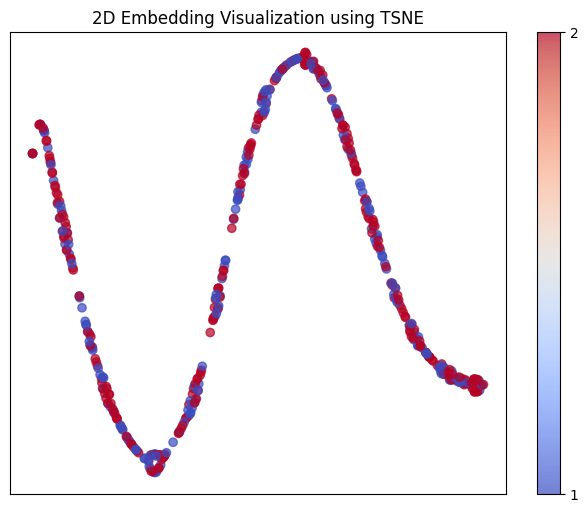

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def extract_embeddings(encoder, dataloader, device):
    encoder.eval()
    embeddings = []
    labels = []

    with torch.no_grad():
        for batch in dataloader:
            meshes = batch['points'].to(device)
            pc_scores = batch['pc_score'].cpu().numpy()  # Convert to numpy array
            embedding = encoder(meshes).cpu().numpy()

            embeddings.append(embedding)
            labels.extend(pc_scores)

    embeddings = np.vstack(embeddings)  # Stack all embeddings
    return embeddings, np.array(labels)

def visualize_embeddings(embeddings, labels, method="tsne"):
    """ Visualize embeddings in 2D using t-SNE or PCA """
    if method == "tsne":
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)
    else:  # Default to PCA
        reducer = PCA(n_components=2)

    reduced_embeddings = reducer.fit_transform(embeddings)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='coolwarm', alpha=0.7)

    # Add legend
    plt.colorbar(scatter, ticks=[1, 2])
    plt.xticks([])
    plt.yticks([])
    plt.title(f"2D Embedding Visualization using {method.upper()}")
    plt.show()

# Extract embeddings after training
embeddings, labels = extract_embeddings(encoder, dataloader_test, device)

# Visualize using t-SNE
visualize_embeddings(embeddings, labels, method="tsne")

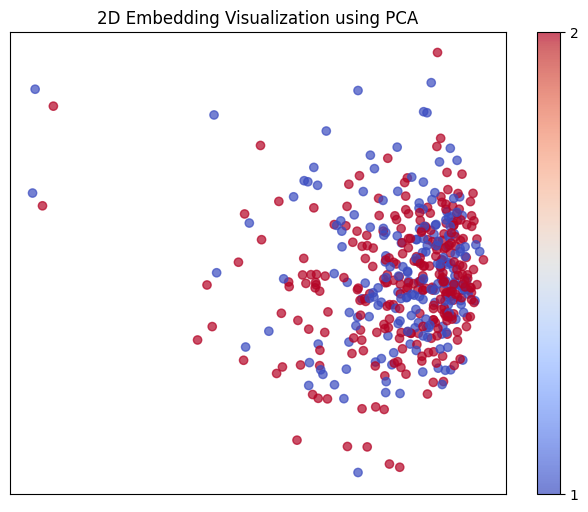

In [ ]:
visualize_embeddings(embeddings, labels, method="pca")

In [ ]:
#batch hard triplets
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class TripletEncoderTrainer:
    def __init__(self, encoder, train_loader, val_loader, test_loader, optimizer, device, margin=1.0):
        self.encoder = encoder.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.optimizer = optimizer
        self.device = device
        self.triplet_loss = nn.TripletMarginLoss(margin=margin, p=2)

        # Accuracy tracking (optional)
        self.correct = 0
        self.total = 0

    def _generate_batch_hard_triplets(self, embeddings, pc_scores):
        """
        Generate triplets using batch-hard mining:
         - For each anchor, select the hardest positive (largest distance among same label)
         - and the hardest negative (smallest distance among different labels).
        """
        batch_size = embeddings.size(0)
        # Compute pairwise distances in the batch (L2 norm)
        pairwise_dist = torch.cdist(embeddings, embeddings, p=2)  # Shape: (batch_size, batch_size)

        anchors = []
        positives = []
        negatives = []

        # Loop over each anchor in the batch
        for i in range(batch_size):
            anchor_label = pc_scores[i]

            # Positive mask: same label (exclude self)
            pos_mask = (pc_scores == anchor_label)
            pos_mask[i] = False  # Exclude the anchor itself

            # Negative mask: different label
            neg_mask = (pc_scores != anchor_label)

            # Skip if no valid positive or negative exists
            if pos_mask.sum() == 0 or neg_mask.sum() == 0:
                continue

            # Hardest positive: positive with maximum distance from the anchor
            pos_distances = pairwise_dist[i][pos_mask]
            hardest_positive_distance, pos_idx_in_mask = pos_distances.max(0)
            # Retrieve the actual index of the hardest positive
            pos_indices = torch.where(pos_mask)[0]
            hardest_positive_index = pos_indices[pos_idx_in_mask]

            # Hardest negative: negative with minimum distance from the anchor
            neg_distances = pairwise_dist[i][neg_mask]
            hardest_negative_distance, neg_idx_in_mask = neg_distances.min(0)
            # Retrieve the actual index of the hardest negative
            neg_indices = torch.where(neg_mask)[0]
            hardest_negative_index = neg_indices[neg_idx_in_mask]

            anchors.append(embeddings[i])
            positives.append(embeddings[hardest_positive_index])
            negatives.append(embeddings[hardest_negative_index])

            # Optional: track triplet accuracy (whether anchor is closer to positive than negative)
            dist_pos = pairwise_dist[i][pos_mask].min()  # (could also use hardest positive distance)
            dist_neg = hardest_negative_distance
            self.correct += (dist_pos < dist_neg).item()
            self.total += 1

        if anchors:
            return torch.stack(anchors), torch.stack(positives), torch.stack(negatives)
        return None, None, None

    def normalize_embeddings(self, embeddings):
        """L2 normalize the embeddings."""
        return embeddings / torch.norm(embeddings, p=2, dim=1, keepdim=True)

    def train_epoch(self):
        self.encoder.train()
        self.correct = 0
        self.total = 0
        total_train_loss = 0

        for batch in self.train_loader:
            meshes = batch['points'].to(self.device)
            # pc_scores here are your gender labels (1 and 2)
            pc_scores = batch['pc_score'].to(self.device)
            embeddings = self.encoder(meshes)
            embeddings = self.normalize_embeddings(embeddings)

            anchors, positives, negatives = self._generate_batch_hard_triplets(embeddings, pc_scores)
            if anchors is None:
                continue

            loss = self.triplet_loss(anchors, positives, negatives)
            total_train_loss += loss.item()

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        return total_train_loss / len(self.train_loader)

    def validate(self):
        self.encoder.eval()
        total_val_loss = 0

        with torch.no_grad():
            for batch in self.val_loader:
                meshes = batch['points'].to(self.device)
                pc_scores = batch['pc_score'].to(self.device)
                embeddings = self.encoder(meshes)
                embeddings = self.normalize_embeddings(embeddings)

                anchors, positives, negatives = self._generate_batch_hard_triplets(embeddings, pc_scores)
                if anchors is None:
                    continue

                total_val_loss += self.triplet_loss(anchors, positives, negatives).item()

        return total_val_loss / len(self.val_loader)

    def test(self):
        self.encoder.eval()
        total_loss = 0.0

        with torch.no_grad():
            for batch in self.test_loader:
                meshes = batch['points'].to(self.device)
                pc_scores = batch['pc_score'].to(self.device)
                embeddings = self.encoder(meshes)
                embeddings = self.normalize_embeddings(embeddings)

                anchors, positives, negatives = self._generate_batch_hard_triplets(embeddings, pc_scores)
                if anchors is None:
                    continue

                total_loss += self.triplet_loss(anchors, positives, negatives).item()

        return total_loss / len(self.test_loader)


trainer = TripletEncoderTrainer(
    encoder=encoder,
    train_loader=dataloader_train,
    val_loader=dataloader_val,
    test_loader=dataloader_test,
    optimizer=optimizer,
    device=device,
    margin=1.0  # You can experiment with different margin values
)

num_epochs = 10
best_val_loss = float('inf')
output_checkpoint = r"root_data\Facial_Norms\results\spirals_autoencoder\latent_16\checkpoints\triplet_encoder.pth.tar"

for epoch in range(num_epochs):
    train_loss = trainer.train_epoch()
    val_loss = trainer.validate()
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Optionally, save model if validation loss improves
    # if val_loss < best_val_loss:
    #     best_val_loss = val_loss
    #     torch.save({'state_dict': encoder.state_dict()}, output_checkpoint)

# Final test evaluation
test_loss = trainer.test()
print(f"Final Test Loss: {test_loss:.4f}")


d:\GeMorph\FaceGen\Neural3DMM\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1, Train Loss: 1.7216, Validation Loss: 1.2186
Epoch 2, Train Loss: 1.0895, Validation Loss: 1.0275
Epoch 3, Train Loss: 1.0187, Validation Loss: 1.0126
Epoch 4, Train Loss: 1.0099, Validation Loss: 1.0080
Epoch 5, Train Loss: 1.0068, Validation Loss: 1.0062
Epoch 6, Train Loss: 1.0052, Validation Loss: 1.0051
Epoch 7, Train Loss: 1.0043, Validation Loss: 1.0041
Epoch 8, Train Loss: 1.0036, Validation Loss: 1.0038
Epoch 9, Train Loss: 1.0033, Validation Loss: 1.0034
Epoch 10, Train Loss: 1.0032, Validation Loss: 1.0034
Final Test Loss: 1.0034
